# Simon Zhang - Feb '18 Data Analyst Performance Task
simonczhang@gmail.com
832-857-3826

# Intro

I am going to explore the two datasets provided, and along the way answer the 4 main questions posed for this task. This analysis will be mainly based on my stream-of-conscious and my own curiosities about the data that come to light as I go through the process, allow the data to lead me inquisitively, but will cover the relevant parts requested for this assignemnt as well. 

In [255]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
from pprint import pprint

In [256]:
ddf = pd.read_csv('district_data.csv')
sdf = pd.read_csv('school_data.csv')

I want to get a good sense of each dataset individually before I combine them and dive deeper.

In [257]:
ddf.head()

,corp1,treatment
0,29,1
1,129,1
2,239,0
3,259,1
4,369,1


In [258]:
ddf.shape

(156, 2)

In [259]:
ddf['treatment'].value_counts()

1    88
0    68
Name: treatment, dtype: int64

There is 88 districts that have been treated and 68 that have not, out of 156 districts.

In [260]:
ddf['corp1'].value_counts()

5374    1
5459    1
2654    1
3164    1
3419    1
5284    1
1624    1
1879    1
5629    1
4219    1
5619    1
3409    1
3029    1
3149    1
2124    1
1604    1
3139    1
2114    1
2399    1
1129    1
4349    1
4684    1
4734    1
5344    1
2819    1
1659    1
1914    1
3449    1
5624    1
4419    1
       ..
4149    1
399     1
3009    1
1164    1
5259    1
3464    1
2439    1
3714    1
4229    1
3459    1
3484    1
3999    1
1184    1
4594    1
5489    1
4539    1
5524    1
5304    1
1974    1
2739    1
4529    1
944     1
6059    1
4744    1
2984    1
4519    1
3494    1
4004    1
674     1
5639    1
Name: corp1, Length: 156, dtype: int64

I wanted to make sure all the 156 district keys were indeed uniqe in the district dataset.

In [261]:
ddf.isnull().sum()

corp1        0
treatment    0
dtype: int64

There doesn't seem to be any values explicitly missing from the district dataset.

In [262]:
sdf.head()

,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
0,5914,6320,241,0.006920,0.000000,0.000000,0.989619,0.161512,18.500000,0,-1.045121
1,239,155,514,0.017143,0.179048,0.032381,0.735238,0.349462,16.000000,1,-0.846501
2,4319,3514,258,0.000000,0.000000,0.019084,0.938931,0.653199,20.400000,0,-0.146986
3,3449,2842,320,0.000000,0.015823,0.000000,0.958861,0.226837,23.299999,0,-0.064126
4,4209,3428,472,0.030426,0.000000,0.010142,0.959432,0.000000,7.700000,0,2.243462


In [263]:
sdf.shape

(520, 11)

In [336]:
sdf['schl1'].value_counts()

3068    1
2796    1
5420    1
302     1
303     1
1328    1
6450    1
5954    1
2450    1
1334    1
6368    1
2362    1
1344    1
321     1
3394    1
171     1
1350    1
1352    1
2898    1
5454    1
1359    1
2386    1
4440    1
4442    1
4444    1
210     1
4446    1
2858    1
4448    1
1378    1
       ..
3738    1
5344    1
2262    1
642     1
590     1
3298    1
1702    1
3724    1
2704    1
1054    1
1026    1
1398    1
3734    1
760     1
2718    1
3766    1
1690    1
3746    1
2579    1
2726    1
2727    1
2728    1
2670    1
2732    1
4862    1
688     1
3762    1
129     1
3134    1
5362    1
Name: schl1, Length: 520, dtype: int64

Looks like there are indeed 520 unique schools in the dataset.

In [265]:
sdf['district'].value_counts()

239     31
1014    12
4714    12
5744    12
1974    12
5364    10
5334    10
5279    10
259      9
5079     9
5344     9
5354     8
5929     8
5374     8
369      8
2399     8
4419     7
4929     7
1129     7
3009     7
2869     7
3629     7
3949     7
4619     6
4664     6
3999     6
4209     6
3449     6
5314     5
4229     5
        ..
2459     1
3819     1
8539     1
3484     1
5524     1
3494     1
2444     1
2439     1
3459     1
3059     1
519      1
4584     1
3439     1
4459     1
5624     1
5459     1
4329     1
3409     1
5999     1
3644     1
5384     1
5709     1
1624     1
3329     1
2654     1
3714     1
4774     1
3309     1
5529     1
2739     1
Name: district, Length: 152, dtype: int64

In the district dataset there were 156 unique district keys. In the school dataset there are only 152 districts with data. The below districts are not present in the school dataset but exist in the district dataset.

In [266]:
d_s = sdf['district'].tolist()
missing_districts = []
for i, s in ddf.iterrows():
    district = s['corp1']
    if district not in d_s:
        missing_districts.append(district)
print(missing_districts)

[2044, 2769, 4019, 5839]


In [267]:
district_count = sdf['district'].value_counts()
print(len(district_count[district_count<2]))

53


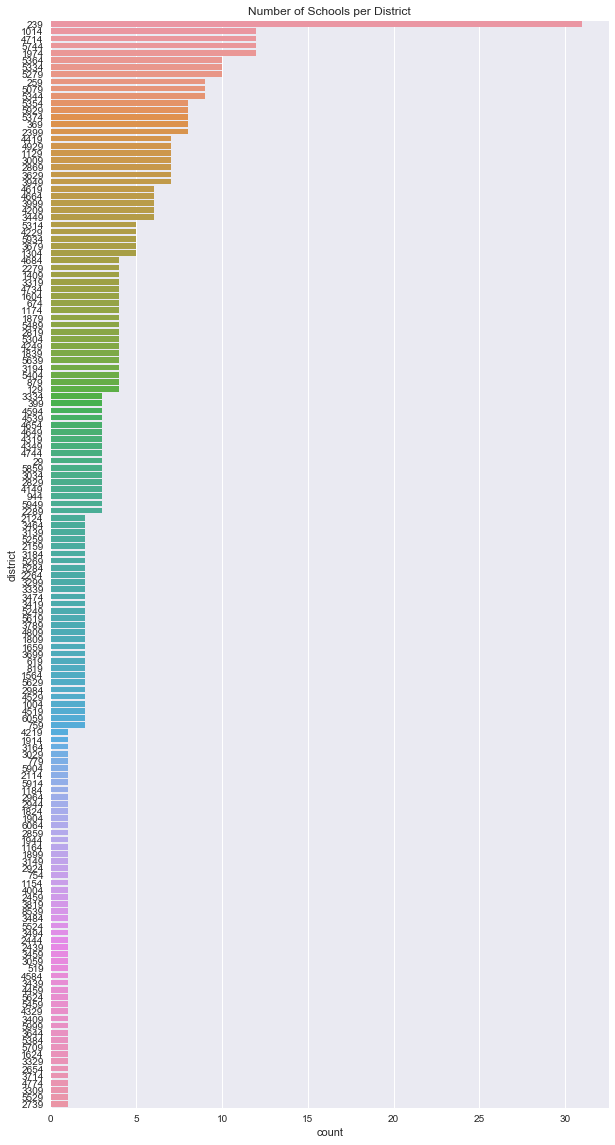

In [333]:
sns.set(rc={'figure.figsize':(10, 20)})
p = sns.countplot(y = 'district', data = sdf, order = sdf['district'].value_counts().index).set_title('Number of Schools per District')


There seems to be a disproportionate number of schools per district represented in the dataset. District 239 has 31 schools while there are 53 other districts with only 1 school represented. This seems rather odd. I cannot tell from the information provided if this is normal, but from my general knowledge of school districts, I feel like there should be more than 1 school in a district and at least where I grew up, not 31 schools in a district. However, the information provided said that all schools in each treated district received treatment. Since the districts were the ones to implement this, maybe the districts did something wrong...

In [269]:
sdf.isnull().sum()

district               0
schl1                  0
enrollment             0
asian_pct             27
black_pct             27
hispanic_pct          27
white_pct             27
pct_frl               27
ed_lesshs              1
positive_env           0
mathscore_gain_std     0
dtype: int64

In [326]:
null_data = sdf[sdf.isnull().any(axis=1)]
null_data.shape
null_data

(28, 11)

,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
39,2159,1642,358,NaN,NaN,NaN,NaN,NaN,31.900000,0,1.112068
67,4539,3738,268,NaN,NaN,NaN,NaN,NaN,24.900000,1,0.407426
68,5859,6286,358,NaN,NaN,NaN,NaN,NaN,18.799999,0,1.354968
81,1304,1054,200,NaN,NaN,NaN,NaN,NaN,29.400000,0,-1.035049
85,5334,5289,702,NaN,NaN,NaN,NaN,NaN,9.400000,0,0.867408
88,1974,1462,300,NaN,NaN,NaN,NaN,NaN,23.799999,1,-1.633518
103,3999,3294,140,NaN,NaN,NaN,NaN,NaN,18.299999,0,0.411487
144,4664,3766,355,NaN,NaN,NaN,NaN,NaN,12.400000,0,1.212134
145,4249,3474,347,NaN,NaN,NaN,NaN,NaN,12.800000,0,0.298029
148,4619,3830,675,NaN,NaN,NaN,NaN,NaN,8.600000,0,1.738986


In [271]:
df = pd.merge(ddf, sdf, left_on='corp1', right_on='district', how = 'outer')
df.head(16)

,corp1,treatment,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
0,29,1,29.0,30.0,329.0,0.003021,0.009063,0.096677,0.851964,0.379603,14.5,0.0,-0.457215
1,29,1,29.0,34.0,335.0,0.003135,0.003135,0.065831,0.815047,0.318885,14.5,0.0,-0.537477
2,29,1,29.0,2.0,233.0,0.000000,0.004237,0.042373,0.927966,0.300000,14.5,0.0,0.300080
3,129,1,129.0,38.0,499.0,0.038710,0.019355,0.019355,0.901075,0.018382,3.8,1.0,0.955901
4,129,1,129.0,64.0,507.0,0.054230,0.013015,0.019523,0.902386,0.003846,3.8,1.0,1.343666
5,129,1,129.0,61.0,383.0,0.020089,0.042411,0.022321,0.892857,0.031008,3.8,0.0,1.630452
6,129,1,129.0,39.0,531.0,0.032653,0.073469,0.030612,0.840816,0.028926,3.8,0.0,1.739707
7,239,0,239.0,155.0,514.0,0.017143,0.179048,0.032381,0.735238,0.349462,16.0,1.0,-0.846501
8,239,0,239.0,263.0,621.0,0.045662,0.242009,0.070015,0.563166,0.392366,16.0,0.0,-0.608421
9,239,0,239.0,146.0,452.0,0.047930,0.250545,0.032680,0.603486,0.423767,16.0,1.0,1.103983


In [272]:
df.shape

(524, 13)

After doing an outer join to merge both datasets there seems to be the the right expected number of data rows and columns. There were 4 districts that were in the districts dataset that were added on top of the 520 rows in the schools dataset. 

In [325]:
null_data = df[df.isnull().any(axis=1)]
null_data.shape
null_data

(0, 12)

,corp1,treatment,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std


In [274]:
32/524

0.061068702290076333

##### Summary of Missing Values in the Joined Dataframe

I wanted to make sure my joined dataset looked right. I previewed the 32 rows that had missing values in the new dataframe and everything seems correct. Rows with missing values account for about 6.11% of the total data. 4 of the rows only have data from the district dataset. There are 27 rows with only missing Race data (black, white, Asian, Hispanic) and percent free lunch. There is 1 row that only has missing local-area education level data. 

Before I try to find any anomolies in the data, I'm going to have to deal with the missing values first. 

In [275]:
df = pd.merge(ddf, sdf, left_on='corp1', right_on='district')
df.drop(['district'], axis=1, inplace=True)
df.shape

(520, 12)

I decided to get rid of the 4 data points that didn't have any school data because there was really no use for them in analyzing math performance when there is no data for it at all and because there was just 4 of them. I also dropped the `district` column as it is the same as the `corp1` column. 

For the rest of the missing values, I am going to replace them with a randomly generated number, who's mu value is set as the mean of the given column values and who's sigma value is set to the std of the given column values. This should be a good substitue for the missing data.

In [334]:
df.columns

Index(['corp1', 'treatment', 'schl1', 'enrollment', 'asian_pct', 'black_pct',
       'hispanic_pct', 'white_pct', 'pct_frl', 'ed_lesshs', 'positive_env',
       'mathscore_gain_std'],
      dtype='object')

In [277]:
#create dictionary for mu,sigma of all columns that contain missing values
column_stat_table = {}

list_col = df.columns[df.isna().any()].tolist()
print(list_col)
for i in list_col:
    mean = np.nanmean(df[i])
    std = np.nanstd(df[i])
    name = i
    column_stat_table[name] = (mean, std)
        
pprint(column_stat_table)

#replace all missing values with a random number in the column's distribution
np.random.seed(1)
df.fillna(99999, inplace = True)
for column in df:
    if column in list_col:
        for tup in df[column].iteritems():
            val = tup[1]
            if val == 99999:
                mu = column_stat_table[column][0]
                std = column_stat_table[column][1]
                random_val = abs(np.random.normal(mu, std))
                df[column].replace(val, random_val, inplace=True)

['asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'pct_frl', 'ed_lesshs']
{'asian_pct': (0.01075677969979716, 0.020236213079422721),
 'black_pct': (0.081781314880324557, 0.14718297638478267),
 'ed_lesshs': (17.528130864973026, 6.4023793195403895),
 'hispanic_pct': (0.055240283257606493, 0.089825756735112949),
 'pct_frl': (0.33870936964097359, 0.18899462583584203),
 'white_pct': (0.81393108290872207, 0.21220774675443163)}


In [278]:
null_data = df[df.isnull().any(axis=1)]
print(null_data.shape)
print(null_data)
print(df.iloc[15])

(0, 12)
Empty DataFrame
Columns: [corp1, treatment, schl1, enrollment, asian_pct, black_pct, hispanic_pct, white_pct, pct_frl, ed_lesshs, positive_env, mathscore_gain_std]
Index: []
corp1                 239.000000
treatment               0.000000
schl1                 186.000000
enrollment            286.000000
asian_pct               0.043627
black_pct               0.055948
hispanic_pct            0.036476
white_pct               0.771329
pct_frl                 0.288396
ed_lesshs              16.000000
positive_env            0.000000
mathscore_gain_std     -0.057523
Name: 15, dtype: float64


Now that I've finished dealing with all the missing values, I will continue to explore the data. 

# Exploring the Data

### Single Variable Analysis

I think that separating the data into two groups, treatment 1 and treatment 0 groups, will be the most helpful in evaluating the effectiveness of the program. First I'll do some single variable analyses looking at distribution of variables. Then I'll move into multivariable analyses of the relationship between variables.

I'll begin by retouching on the schools per district plot that I made earlier. 

In [279]:
'''
Order to explore the data. 
1. Create correlation matrix
2. analyze all variables by comparing treatment 0 to treatment 1 groups
    maybe change enrollment to categorical value by binning
3. to determine if the two groups are randomly assigned, maybe compare the two conditions based on distribution
    of all variables. This is because random assignment helps to make both groups equal on all other characteristics,
    other than the dependent variable, math score. In this case all the other variables would be demographics. So,
    if I just compared the two demographics and if theyre roughly equal in distribution, then I can likely conclude
    that the researchers are correct. This is a between-groups experiment. Finally, I can generate random numbers 
    either 0 or 1, X times and find count of 0 and 1. I do this 5 times and see the counts for all 5 times to determine
    the probablistic nature to get 88 1's and 68 0's randomly. 
    

'''

"\nOrder to explore the data. \n1. Create correlation matrix\n2. analyze all variables by comparing treatment 0 to treatment 1 groups\n    maybe change enrollment to categorical value by binning\n3. to determine if the two groups are randomly assigned, maybe compare the two conditions based on distribution\n    of all variables. This is because random assignment helps to make both groups equal on all other characteristics,\n    other than the dependent variable, math score. In this case all the other variables would be demographics. So,\n    if I just compared the two demographics and if theyre roughly equal in distribution, then I can likely conclude\n    that the researchers are correct. This is a between-groups experiment. Finally, I can generate random numbers \n    either 0 or 1, X times and find count of 0 and 1. I do this 5 times and see the counts for all 5 times to determine\n    the probablistic nature to get 88 1's and 68 0's randomly. \n    \n\n"

##### Schools

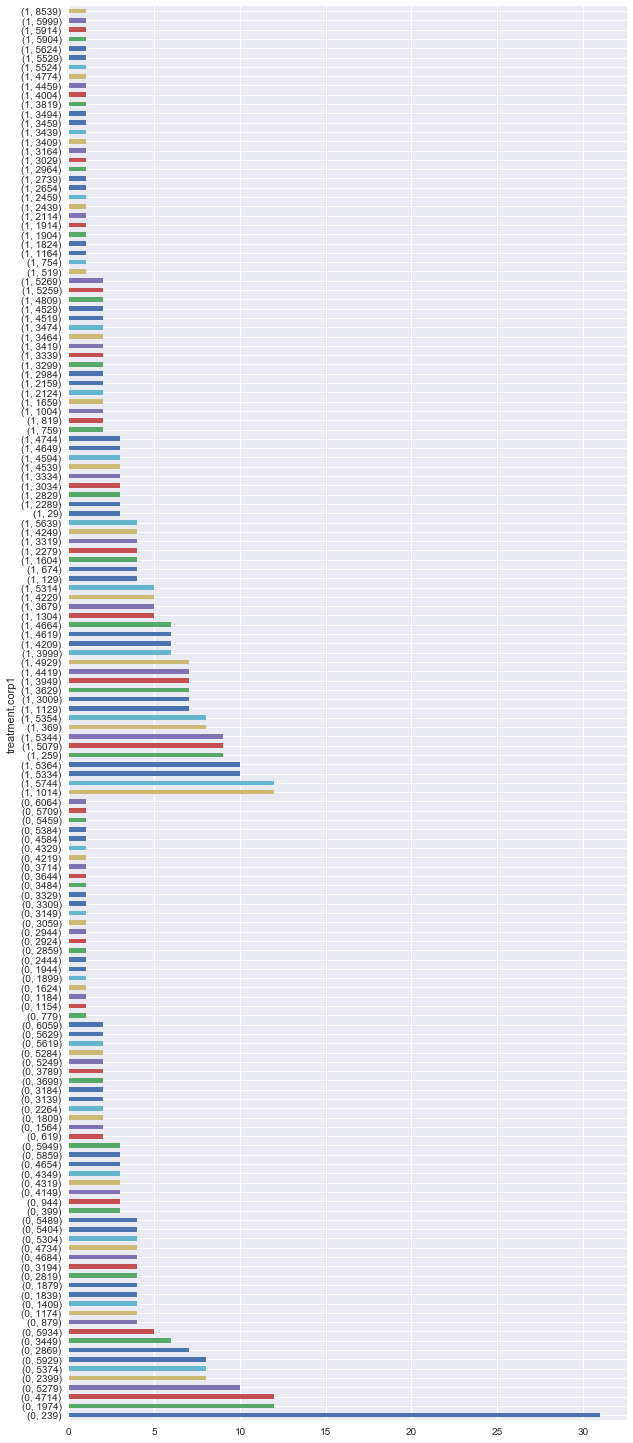

In [280]:
#Distribution of schools per district, per treatment group
a = df.groupby(['treatment'])['corp1'].value_counts()
a.plot(kind='barh', figsize= (10,26))


Here I separated the two treatment groups and looked at the number of schools in each district. The distribution of schools per district still seems odd but at least both the treatment groups show a similar trend here. This helps support the notion that the treatment assignments by the researchers was random. Before I say anything conclusion of the random assignment, I want to look at the distribution of other variables between the two groups as well.

In [281]:
#find number of schools per treatment group
a = df.groupby(['treatment'])['schl1'].count()
a
#a.plot(kind='bar')
b = ddf['treatment'].value_counts()
b

treatment
0    229
1    291
Name: schl1, dtype: int64

1    88
0    68
Name: treatment, dtype: int64

Now that I've seen the distribution of schools per district in the two groups, I wanted to look at total number of schools in each treatment group. There are 291 schools in the treatment 1 group and 229 schools in treatment 0 group. This seems to be normal given there's 20 more treatment 1 districts than treatment 0 districts.

Next, I'll look at the distribution of all the other variables separated by treatment group and also some basic statistics of the variables.

##### Enrollment

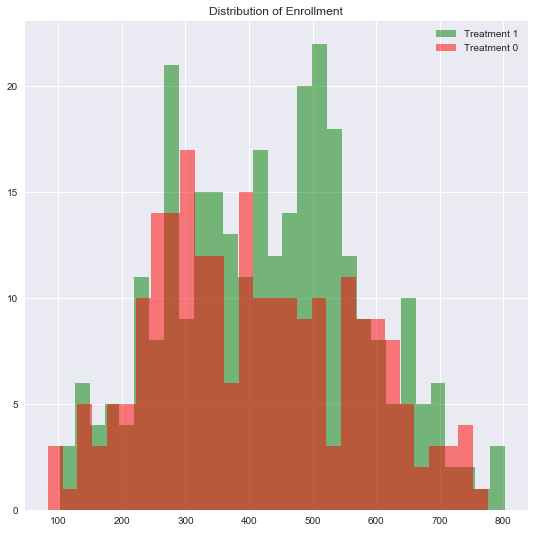

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,408.615721,155.350173,84.0,288.0,397.0,524.0,775.0
1,291.0,431.395189,151.222781,103.0,317.0,439.0,530.0,802.0


In [337]:
a = df[df['treatment'] == 1]['enrollment']
b = df[df['treatment'] == 0]['enrollment']

bins = np.linspace(-1, 1, 10)
q = plt.figure(figsize=(9,9))
q = plt.hist(a, 30, alpha=0.5, label='Treatment 1', color='green', density=False)
q = plt.hist(b, 30, alpha=0.5, label='Treatment 0', color='red', density=False)
q = plt.legend(loc='upper right')
q = plt.title('Distribution of {}'.format('Enrollment'))
plt.show()

df.groupby(['treatment'])['enrollment'].describe()

Looks like there is slightly more kids enrolled in treatment 1 group schools on average. The variance is pretty big though so I don't think there's a significant difference.

In [283]:
df[df['corp1']==239]['enrollment'].describe()

count     31.000000
mean     459.870968
std      129.393390
min      257.000000
25%      354.000000
50%      464.000000
75%      572.000000
max      711.000000
Name: enrollment, dtype: float64

I wanted to see if the school in treatment 0 that had 31 schools could be pulling the average down but it doesn't seem so. I'll go ahead and look at the distribution of the rest of the variables by the two groups.

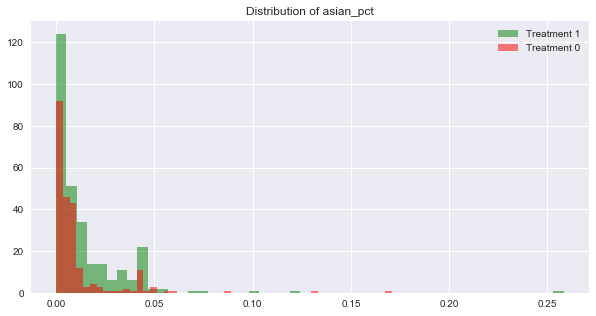

Statistics for asian_pct below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.010264,0.019066,0.0,0.000000,0.004950,0.009288,0.170732
1,291.0,0.014195,0.022336,0.0,0.000653,0.007042,0.018387,0.258352


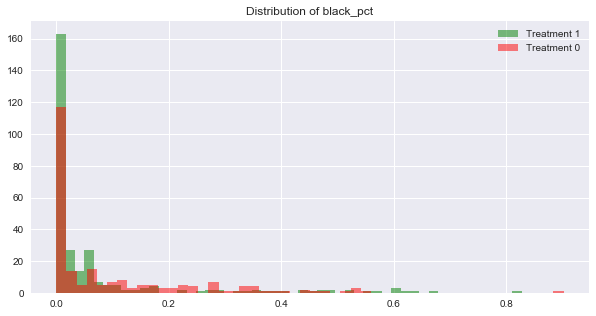

Statistics for black_pct below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.091761,0.141057,0.0,0.001377,0.017143,0.129496,0.901674
1,291.0,0.071531,0.145127,0.0,0.000800,0.011129,0.055948,0.827068


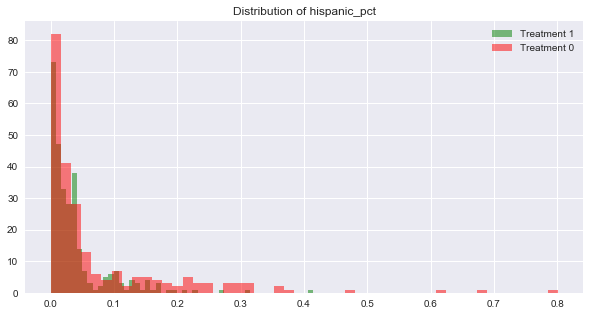

Statistics for hispanic_pct below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.073642,0.115330,0.0,0.008547,0.027864,0.084942,0.801075
1,291.0,0.039018,0.052543,0.0,0.008227,0.022321,0.040603,0.414634


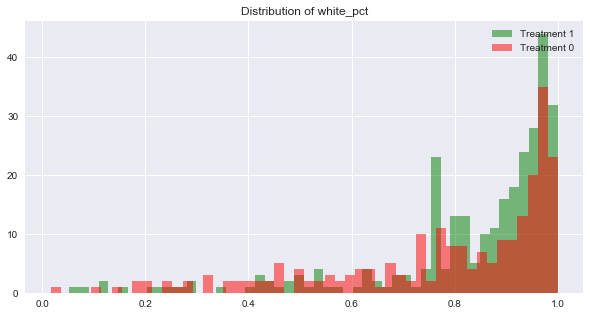

Statistics for white_pct below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.781051,0.225351,0.016736,0.678392,0.861742,0.962687,1.0
1,291.0,0.835853,0.188312,0.052632,0.773742,0.905336,0.963189,1.0


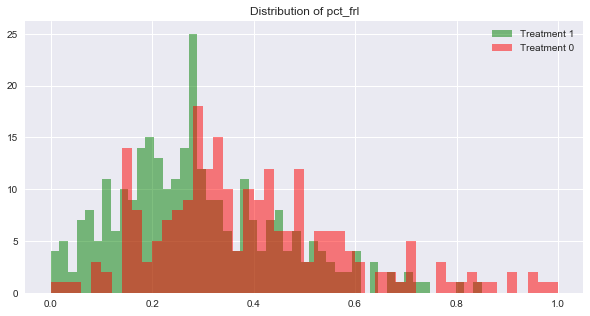

Statistics for pct_frl below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.393714,0.193266,0.0,0.267218,0.349462,0.494662,1.000000
1,291.0,0.290645,0.163507,0.0,0.177597,0.274924,0.387736,0.849315


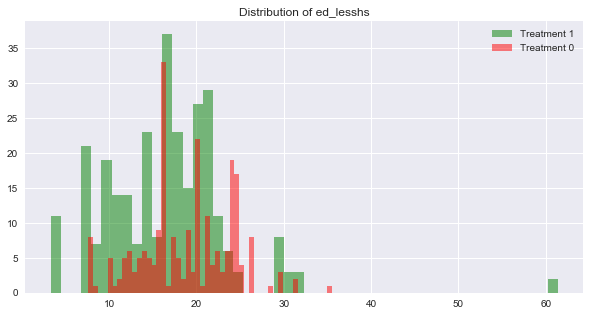

Statistics for ed_lesshs below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,18.880943,5.179399,7.6,15.9,19.299999,23.299999,35.500000
1,291.0,16.449828,7.050597,3.3,11.8,16.400000,20.500000,61.400002


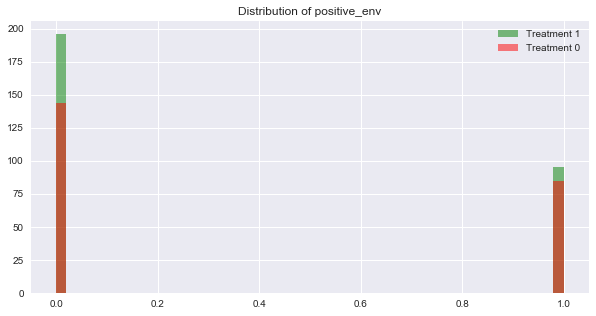

Statistics for positive_env below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,0.371179,0.484179,0.0,0.0,0.0,1.0,1.0
1,291.0,0.326460,0.469726,0.0,0.0,0.0,1.0,1.0


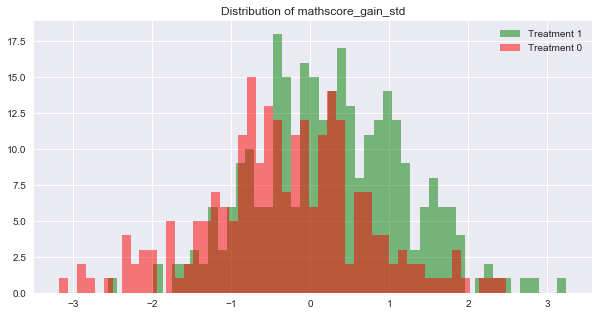

Statistics for mathscore_gain_std below:


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,229.0,-0.314813,1.013710,-3.177708,-0.878541,-0.329303,0.308151,2.470063
1,291.0,0.275373,0.943731,-2.564522,-0.371354,0.237052,0.939742,3.238389


In [323]:
plot_list = ['asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'pct_frl', 'ed_lesshs', 'positive_env', 'mathscore_gain_std']
for i in plot_list:
    a = df[df['treatment'] == 1][i]
    b = df[df['treatment'] == 0][i]

    bins = np.linspace(-1, 1, 10)
    q = plt.figure(figsize=(10,5))
    q = plt.hist(a, 50, alpha=0.5, label='Treatment 1', color='green')
    q = plt.hist(b, 50, alpha=0.5, label='Treatment 0', color='red')
    q = plt.legend(loc='upper right')
    q = plt.title('Distribution of {}'.format(i))
    plt.show()
    
    print('Statistics for {} below:'.format(i))
    df.groupby(['treatment'])[i].describe()

I briefly comment on each plot below:

##### Asian Percent

Looks like the Asian percentage is mainly under 1%. The distribution is heavily skewed to the right and the median for both treatment groups is less than 1%. 

##### Black Percent

The black percentage looks similarly skewed to the right but far less sparse than the Asian distribution. It ranges from 0% all the way up to 90%. The difference between the two group's median percentage is less than 1% and all else seems rather equal as well. The standard deviations are pretty large for both groups. 

##### Hispanic Percent

The hispanic percent distribution is similar to the black one but the median for both treatment groups is about 1% higher. It does look like there are more schools in the treatment 0 group with hispanic percentage greater than .1 though.

##### White Percent

The white distribution is the first race distribution where the graph is heavily skewed left. The median for treatment group 0 and group 1 are .86 and .91, respectively. This is the completely opposite distribution as the other three races that I looked at. Exciting! There's some schools with just 1% white students and some with 100%. 

##### Free Lunch Eligibility Percentage

In [289]:
a = df[df['pct_frl'] > 1]
a
b = sdf[sdf['pct_frl'] > 1]
b

,corp1,treatment,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
354,4714,0,4454,640,0.0,0.539683,0.285714,0.107937,1.032051,24.4,0,-1.950318


,district,schl1,enrollment,asian_pct,black_pct,hispanic_pct,white_pct,pct_frl,ed_lesshs,positive_env,mathscore_gain_std
152,4714,4454,640,0.0,0.539683,0.285714,0.107937,1.032051,24.4,0,-1.950318


In [290]:
df.at[354, 'pct_frl'] = 1.0
df.iloc[354]

corp1                 4714.000000
treatment                0.000000
schl1                 4454.000000
enrollment             640.000000
asian_pct                0.000000
black_pct                0.539683
hispanic_pct             0.285714
white_pct                0.107937
pct_frl                  1.000000
ed_lesshs               24.400000
positive_env             0.000000
mathscore_gain_std      -1.950318
Name: 354, dtype: float64

Wow! The weird thing is that there exists a school in which the percentage of students that are eligible for lunch subsidies is greater than 100% or 1.0! Do the faculty and staff get to eat for free too?!

I thought this might have been a mistake when I added random variables to fill in the missing values but I checked with the original school dataset and it was there all along. I went ahead and change this number to 1.0 so it makes sense.

The difference in means between the two groups is is more than we've seen in the past at 10% but the variance is still too large; however, graphically, you can see a clear shift in the distribution.

###### Education Less than HS

In [ ]:
a = df[df['ed_lesshs'] > 60]
a

There's two outlier with at 60%! They're two schools from the same district (4529) that are almost completely white students, both in treatment 1, almost identical variables other than the positive environment school had a math loss of .43 while the non-positive environment school had a math gain of .81.

##### Positive Environment

Only about 1/3 of the schools have positive environments in both treatment groups.

##### Std Math Score Gain

The mean math gain seems appears that the program does have a little affect on. Graphically, the green distribution is clearly shifted toward the positive side of the graph, but the variance is still too high to see a significant difference in the two means. 

### Multivariate Analysis

In [ ]:
#correlation matrix//use seaborn more!

(520, 12)


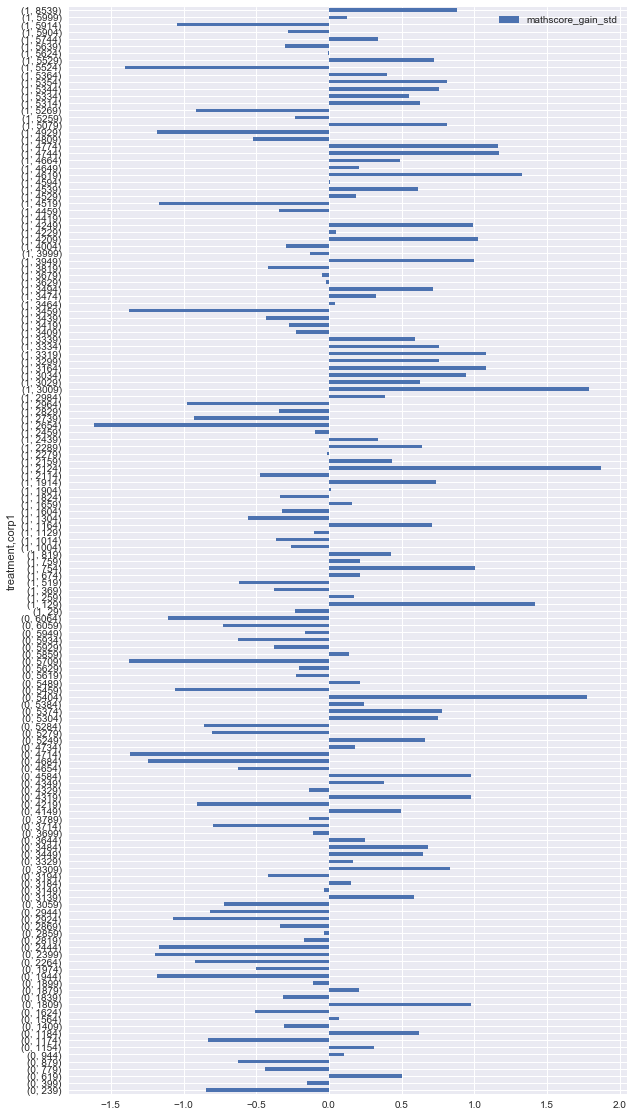

In [332]:
#average math score gain by district for both treatment groups
table = pd.pivot_table(df, index =['treatment','corp1'], values = ['mathscore_gain_std'], aggfunc=np.mean)
table.plot(kind='barh', figsize=(10,20))


In [ ]:
#Asian percent
#make scatterplots 
a = df[df['asian_pct'] > .1]
b = pd.pivot_table(index = ['treatment', 'corp1'], data = a)
b

In districts where the Asian percentage is greater than 10% for both treatment groups, the math score gain is positive. There is a slightly higher gain in treatment 1 group.

In [298]:
a = df[df['black_pct'] > .5]
b = pd.pivot_table(index=['treatment', 'schl1', 'black_pct'], data = a)
b

asian_pct  corp1  ed_lesshs  enrollment  \
treatment schl1 black_pct                                            
0         4454  0.539683    0.000000   4714  24.400000         640   
          4458  0.901674    0.004184   4714  24.400000         470   
          5399  0.523810    0.004329   5374   7.600000         458   
          5411  0.545817    0.013944   5374   7.600000         501   
          5414  0.528139    0.034632   5374   7.600000         473   
          5429  0.505725    0.009542   5374   7.600000         506   
1         303   0.663934    0.045082    259  16.900000         400   
          310   0.827068    0.002506    259  16.900000         425   
          4804  0.601286    0.000000   4929  20.799999         369   
          4822  0.525469    0.000000   4929  20.799999         311   
          5345  0.610294    0.017647   5354   7.900000         651   
          5347  0.627451    0.015251   5354   7.900000         448   
          5350  0.629243    0.022193   5354   7.900000         741   
          5352  0.521385    0.024440   5354   7.900000         511   
          5364  0.599057    0.009434   5364  16.400000         407   
          5373  0.567073    0.029268   5354   7.900000         797   
          5382  0.547216    0.026634   5364  16.400000         318   

                           hispanic_pct  mathscore_gain_std   pct_frl  \
treatment schl1 black_pct                                               
0         4454  0.539683       0.285714           -1.950318  1.000000   
          4458  0.901674       0.046025           -2.230451  0.914405   
          5399  0.523810       0.021645            0.683436  0.329193   
          5411  0.545817       0.105578            2.349952  0.495202   
          5414  0.528139       0.168831            0.946275  0.492308   
          5429  0.505725       0.192748            0.597386  0.328386   
1         303   0.663934       0.108607           -0.536247  0.564706   
          310   0.827068       0.037594           -1.227202  0.747036   
          4804  0.601286       0.032154           -1.947255  0.668539   
          4822  0.525469       0.016086           -2.564522  0.663551   
          5345  0.610294       0.213235            0.902085  0.546314   
          5347  0.627451       0.163399            0.414198  0.336484   
          5350  0.629243       0.121410           -0.097336  0.241245   
          5352  0.521385       0.136456            0.130693  0.317708   
          5364  0.599057       0.018868           -0.844053  0.512195   
          5373  0.567073       0.051220            0.619762  0.171795   
          5382  0.547216       0.169492            1.411931  0.462222   

                           positive_env  white_pct  
treatment schl1 black_pct                           
0         4454  0.539683              0   0.107937  
          4458  0.901674              1   0.016736  
          5399  0.523810              1   0.361472  
          5411  0.545817              1   0.260956  
          5414  0.528139              1   0.177489  
          5429  0.505725              1   0.234733  
1         303   0.663934              0   0.120902  
          310   0.827068              0   0.052632  
          4804  0.601286              1   0.241158  
          4822  0.525469              0   0.404826  
          5345  0.610294              0   0.077941  
          5347  0.627451              0   0.124183  
          5350  0.629243              0   0.155352  
          5352  0.521385              1   0.242363  
          5364  0.599057              0   0.285377  
          5373  0.567073              0   0.280488  
          5382  0.547216              1   0.210654


In schools that have 50% or more black students, it seems here that treatment doesn't have a direct relationship with math scores, but if you look at the `ed_lesshs` column, you can see there's a really good inverse relationship between it and math scores. This relationship isn't quite as apparently when looking at the Asian percent possibly due to the fact that there's much less variation in the `ed_lesshs` as well as much less data. I'll keep this in mind and continue.

In [287]:
a = df[df['hispanic_pct'] > .4]
b = pd.pivot_table(index=['treatment', 'schl1'], data = a)
b

asian_pct  black_pct  corp1  ed_lesshs  enrollment  \
treatment schl1                                                       
0         994     0.000000   0.000000   1174       24.9         409   
          4444    0.000000   0.014793   4714       24.4         337   
          4448    0.002203   0.090308   4714       24.4         414   
          4456    0.003155   0.064669   4714       24.4         661   
1         3790    0.006098   0.048780   4594       29.1         339   

                 hispanic_pct  mathscore_gain_std   pct_frl  positive_env  \
treatment schl1                                                             
0         994        0.801075           -1.283995  0.913151             1   
          4444       0.473373           -0.499026  0.496855             1   
          4448       0.687225           -1.021157  0.966292             0   
          4456       0.616719           -1.501899  0.718153             0   
1         3790       0.414634            0.552072  0.696165             0   

                 white_pct  
treatment schl1             
0         994     0.193548  
          4444    0.500000  
          4448    0.193833  
          4456    0.272871  
1         3790    0.500000

Here the `ed_lesshs` column is more stable like in the Asian percent table but much higher values. With such high values, it makes sense that the gain in math score is much lower as per my previous hypothesis. I think this table gives a good case for the positive influence of the treatment. It does show a slight positive increase in the treatment 1 group as opposed to a negative gain in ALL the treatment 0 schools, in this case, in schools with hispanic dominated schools. There is only 1 school in treatment 1 group though so I should still be weary. 

In [288]:
a = df[df['white_pct'] > .9]
b = pd.pivot_table(index=['treatment'], data = a)
b

a = df[df['white_pct'] > .9]
b = pd.pivot_table(index=['treatment', 'corp1'], data = a)
b

,asian_pct,black_pct,corp1,ed_lesshs,enrollment,hispanic_pct,mathscore_gain_std,pct_frl,positive_env,schl1,white_pct
treatment,,,,,,,,,,,
0,0.002964,0.004053,3540.050000,18.264360,395.420000,0.012150,-0.145132,0.283402,0.330000,3252.57,0.961312
1,0.005911,0.005328,3294.433333,17.848667,389.186667,0.012558,0.250329,0.255561,0.346667,2882.86,0.957380


asian_pct  black_pct  ed_lesshs  enrollment  hispanic_pct  \
treatment corp1                                                              
0         399     0.001548   0.006192  12.300000  244.500000      0.024360   
          619     0.001149   0.002857  14.500000  486.000000      0.008046   
          779     0.000000   0.000000  12.200000  537.000000      0.007394   
          944     0.001238   0.003713  17.799999  515.666667      0.014495   
          1154    0.000000   0.003339  12.700000  585.000000      0.005008   
          1184    0.006993   0.004662  14.000000  415.000000      0.000000   
          1409    0.004202   0.002801  22.400000  267.000000      0.015406   
          1564    0.005228   0.001743  14.000000  554.000000      0.002568   
          1624    0.009288   0.021672  21.100000  676.000000      0.003096   
          1809    0.002747   0.000000  18.400000  424.000000      0.011905   
          1839    0.004993   0.000583  15.200000  540.000000      0.017527   
          1879    0.002467   0.005863  10.300000  318.250000      0.002002   
          1899    0.000000   0.003676  17.000000  261.000000      0.011029   
          1944    0.011080   0.005540  12.400000  402.000000      0.000000   
          2264    0.007605   0.022814  22.600000  271.000000      0.011407   
          2399    0.001319   0.009539  26.200001  259.714286      0.001309   
          2444    0.000000   0.000000  13.900000  423.000000      0.009592   
          2819    0.000831   0.003967  13.700000  223.750000      0.005967   
          2859    0.003263   0.000000  21.500000  630.000000      0.009788   
          2924    0.003431   0.000000  17.500000  610.000000      0.005146   
          3059    0.006250   0.000000  14.000000  336.000000      0.016667   
          3139    0.007800   0.014041  11.500000  618.000000      0.024961   
          3149    0.000000   0.002053  13.536051  496.000000      0.000000   
          3184    0.000000   0.000000  18.900000  364.000000      0.005540   
          3194    0.003544   0.003428  21.400000  312.500000      0.014606   
          3309    0.008646   0.017291   8.200000  683.000000      0.005764   
          3329    0.002755   0.001377  10.600000  731.000000      0.012397   
          3449    0.002195   0.006593  23.299999  323.250000      0.002660   
          3484    0.008584   0.005722  10.300000  691.000000      0.008584   
          3644    0.000000   0.000000  28.799999  142.000000      0.019481   
...                    ...        ...        ...         ...           ...   
1         3629    0.002878   0.000269  15.000000  386.857143      0.006886   
          3679    0.007541   0.006407  19.299999  294.666667      0.024699   
          3819    0.000000   0.000000  18.500000  527.000000      0.040541   
          3949    0.006806   0.003340  21.500000  319.166667      0.022393   
          3999    0.000000   0.001626  18.299999  201.000000      0.004167   
          4004    0.003125   0.007812  20.900000  649.000000      0.004687   
          4209    0.028594   0.005905   7.700000  532.833333      0.014621   
          4229    0.003552   0.007057  19.700001  402.000000      0.013243   
          4249    0.012550   0.009946  12.800000  426.500000      0.019374   
          4419    0.017488   0.011129  17.500000  532.000000      0.044515   
          4459    0.002183   0.006550  20.000000  474.000000      0.039301   
          4519    0.001106   0.002212  20.000000  336.000000      0.026765   
          4529    0.001458   0.000000  61.400002  336.000000      0.015881   
          4539    0.007752   0.003876  24.900000  241.000000      0.027132   
          4649    0.000000   0.002137  11.800000  472.333333      0.024352   
          4664    0.008967   0.007348  12.400000  485.333333      0.039530   
          4774    0.003937   0.007874  14.400000  243.000000      0.003937   
          4809    0.007317   0.004878  16.500000  414.000000      0.009756   
          5079    0.002189   0.002274  

Theres 250 schools that have a white percentage that is greater than 90%. That's almost half of all the schools in the dataset. This accounts for 124 districts out of the 156 total districts. It looks like there's another good case for the treatment working. With all other variables being close to equal, there is a negative gain of .15 in treatment 0 group and positive gain of .25 in treatment 1 group for schools where the white percentage is greater than 90%. 

### Regression

# Conclusion